In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('instagramcom-labeling.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df = df.dropna()
df

,Steming,Label
0,selamat,Positif
1,kakak maribelajar uang saku,Netral
2,tolong tag kakak,Positif
3,kakmaaf kakak,Negatif
4,selamat malam kakak mohon maaf ganggu buka lin...,Positif
...,...,...
412,siaap kakak,Positif
413,min ajar hari jam jam,Netral
414,umum kakak,Netral
415,min langsung apply test,Netral


In [3]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_17836\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Netral     229
Positif    164
Negatif     24
Name: count, dtype: int64

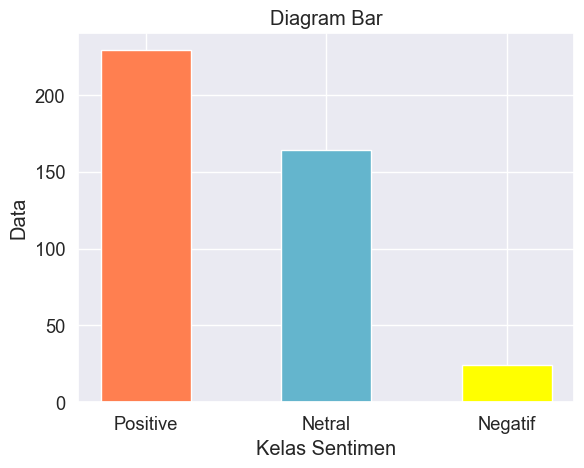

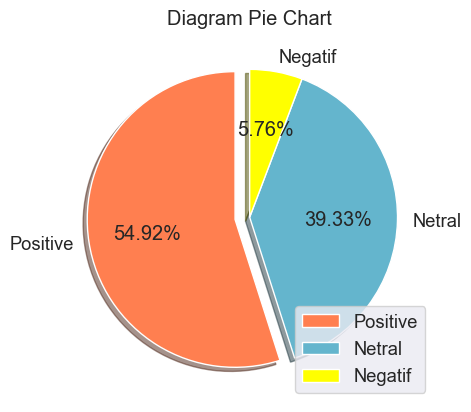

In [4]:
labels = ['Positive','Netral','Negatif']
Category2 = [229,164,24]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c','yellow'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar')
plt.show()

#pie chart
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [5]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.3, random_state = 1)

In [6]:
# Membuat data frame dari hasil split
df_train70 = pd.DataFrame()
df_train70['Steming'] = train_X
df_train70['Label'] = train_Y

df_test30 = pd.DataFrame()
df_test30['Steming'] = test_X
df_test30['Label'] = test_Y

In [7]:
#Data frame train hasil pembagian
df_train70

,Steming,Label
27,umum yad status pendaftatanku ubah masihsudah ...,Netral
89,umum min,Netral
325,kakak umum,Netral
73,halo kakak grup,Netral
69,maaf kakak cek pesan,Negatif
...,...,...
255,sedia jenjang didik kakak,Positif
72,lolos program sib masuk kelompok,Netral
396,office luar tulis akun office officenyaa,Netral
235,cek pesan,Netral


In [8]:
#Data Frame test Hasil Pembagian
df_test30

,Steming,Label
162,min lowong kmren proses terima tolong tolak ng...,Positif
356,hai teman teman test tanggal januari ada umum ...,Positif
228,daftar pathway kakak,Netral
164,hi kakak akun maribelajar non aktif,Netral
173,kakak,Netral
...,...,...
272,done kakak,Netral
191,rezeki kakak,Netral
82,lolos kakak,Netral
382,learning track intelligence cloud track materi...,Positif


In [9]:
df_test30.to_csv('instagramcom-test30.csv')

In [10]:
df_train70.to_csv('instagramcom-train70.csv')

In [11]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_7030 = TfidfVectorizer()
tfidf_vect_7030.fit(df['Steming'])
train_X_tfidf_7030 = tfidf_vect_7030.transform(df_train70['Steming'])
test_X_tfidf_7030 = tfidf_vect_7030.transform(df_test30['Steming'])

In [12]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf_7030)

  (0, 633)	0.43893173793340456
  (0, 596)	0.2562914080209498
  (0, 590)	0.39096134020285866
  (0, 517)	0.39096134020285866
  (0, 409)	0.43893173793340456
  (0, 324)	0.43893173793340456
  (0, 95)	0.22501102953520144
  (1, 596)	0.8033647922097965
  (1, 343)	0.5954872044281979
  (2, 596)	0.9094539907830813
  (2, 220)	0.41580456785457187
  (3, 220)	0.23327774501401918
  (3, 162)	0.5258427382949298
  (3, 154)	0.8179675471946697
  (4, 419)	0.5096483631815184
  (4, 306)	0.6496801999596662
  (4, 220)	0.24172862799669845
  (4, 83)	0.5096483631815184
  (5, 513)	0.46039931580176024
  (5, 351)	0.503742825083444
  (5, 279)	0.44492934773146253
  (5, 220)	0.2873267789302414
  (5, 172)	0.503742825083444
  (6, 560)	0.23996496412530446
  (6, 485)	0.46149935077284715
  :	:
  (285, 585)	0.501293263922403
  (285, 188)	0.5355296471953135
  (285, 52)	0.4184746796351606
  (286, 473)	0.48699930824904664
  (286, 220)	0.1620100121938822
  (286, 209)	0.606870838693823
  (286, 109)	0.606870838693823
  (287, 496)	0

In [13]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_7030)

  (0, 576)	0.29554681116167525
  (0, 575)	0.36689853575054515
  (0, 560)	0.21418344100350623
  (0, 440)	0.3142309385963137
  (0, 364)	0.4119164617622994
  (0, 343)	0.17828132375665387
  (0, 300)	0.38558266318518364
  (0, 249)	0.38558266318518364
  (0, 175)	0.36689853575054515
  (1, 596)	0.21916890496516706
  (1, 566)	0.2863397685688366
  (1, 555)	0.6422528163716723
  (1, 541)	0.22132123030194917
  (1, 302)	0.32112640818583615
  (1, 205)	0.28010427785953246
  (1, 159)	0.2933104541237005
  (1, 3)	0.3753547147763079
  (2, 405)	0.8657893940081134
  (2, 220)	0.23113081291314985
  (2, 95)	0.4438324825259753
  (3, 371)	0.5349417873084913
  (3, 321)	0.37081473065661213
  (3, 220)	0.14280785952971173
  (3, 168)	0.27233351436775627
  (3, 17)	0.44227974871014286
  :	:
  (120, 220)	0.42854419620743367
  (121, 220)	0.30726970567786255
  (121, 121)	0.9516224713470358
  (122, 457)	0.9661644353344211
  (122, 220)	0.2579268964162507
  (123, 298)	0.8882670784434253
  (123, 220)	0.4593273313809898
  (124

In [14]:
print(train_X_tfidf_7030.shape)
print(test_X_tfidf_7030.shape)

(291, 641)
(126, 641)


In [15]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_7030.vocabulary_)

{'selamat': 475, 'kakak': 220, 'maribelajar': 321, 'uang': 588, 'saku': 462, 'tolong': 576, 'tag': 532, 'kakmaaf': 221, 'malam': 313, 'mohon': 354, 'maaf': 306, 'ganggu': 145, 'buka': 77, 'link': 292, 'format': 138, 'surat': 522, 'nyata': 379, 'tanggung': 543, 'mutlak': 358, 'mahasiswa': 308, 'isi': 194, 'susah': 526, 'hapus': 163, 'sedia': 473, 'harap': 164, 'tanggal': 541, 'terima': 560, 'kasih': 229, 'juta': 216, 'bulan': 78, 'scraping': 471, 'bahasa': 46, 'python': 443, 'ayo': 40, 'ikut': 176, 'giat': 149, 'takut': 535, 'narsumnya': 360, 'mantaaap': 316, 'lupa': 305, 'hadirr': 158, 'main': 309, 'menkrep': 335, 'paket': 398, 'kursus': 270, 'cepat': 84, 'hi': 168, 'latih': 281, 'batchnya': 59, 'lembaga': 284, 'daftar': 95, 'perintah': 412, 'sertifikat': 489, 'bnsp': 72, 'halo': 162, 'usaha': 604, 'kerja': 242, 'teknologi': 551, 'informasi': 185, 'komunikasi': 253, 'swasta': 528, 'indonesia': 181, 'power': 428, 'bi': 68, 'pakai': 397, 'teliti': 554, 'kualitatif': 264, 'wawancara': 619

In [16]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear',
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_7030,train_Y)

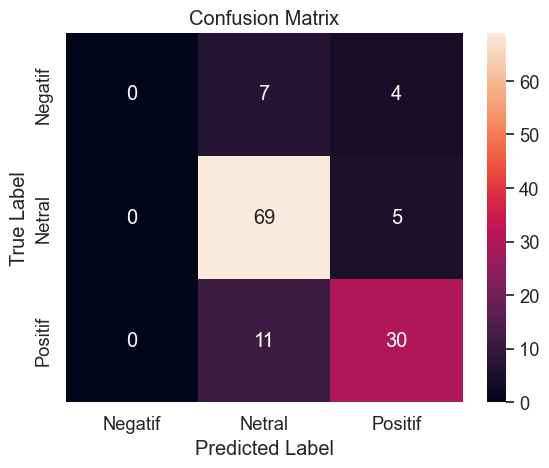

In [17]:
# Proses Pengujian
predictions_SVM_7030 = clf.predict(test_X_tfidf_7030)

#simpan data frame
test_prediction_7030 = pd.DataFrame()
test_prediction_7030['Text'] = test_X
test_prediction_7030['Label'] = predictions_SVM_7030

test_prediction_7030.to_csv('instagramcom-test_prediction_7030.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_7030), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_7030))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_7030))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_7030, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_7030, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_7030, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        11
      Netral       0.79      0.93      0.86        74
     Positif       0.77      0.73      0.75        41

    accuracy                           0.79       126
   macro avg       0.52      0.55      0.54       126
weighted avg       0.72      0.79      0.75       126

Accuracy of the model :  0.7857142857142857
Precision of the model:  0.5207780725022104
Recall of the model:  0.5547132498352011
F1-score of the model:  0.5357142857142857


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [19]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_X_tfidf_7030,train_Y)
predictions= clf.predict(test_X_tfidf_7030)

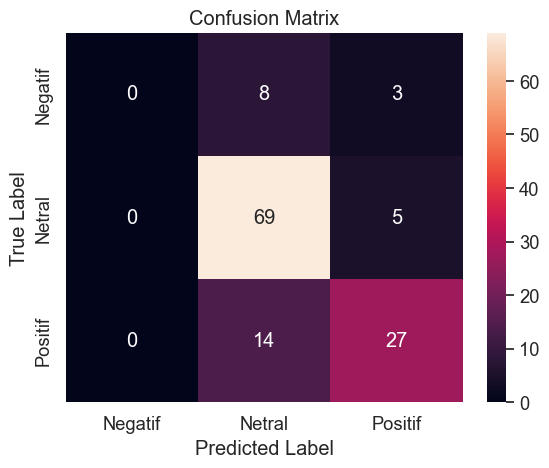

In [20]:
from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["Negatif","Netral","Positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report


print (classification_report(test_Y, predictions))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions))
print('Precision of the model: ', precision_score(test_Y, predictions, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions, average='macro'))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        11
      Netral       0.76      0.93      0.84        74
     Positif       0.77      0.66      0.71        41

    accuracy                           0.76       126
   macro avg       0.51      0.53      0.52       126
weighted avg       0.70      0.76      0.72       126

Accuracy of the model :  0.7619047619047619
Precision of the model:  0.5098901098901099
Recall of the model:  0.530323005932762
F1-score of the model:  0.5156299840510367


c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Laurence Nicholas S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c